# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 49.88 66.07 22.3 39.93 ... 501.8 411.0 402.1

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.7/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


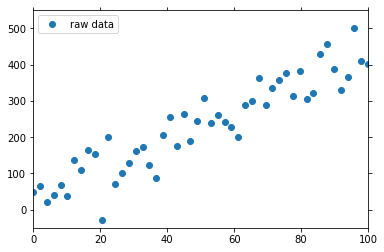

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

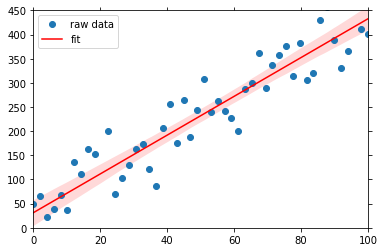

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 31.24460468,  35.30058962,  39.35657455,  43.41255949,
         47.46854443,  51.52452937,  55.5805143 ,  59.63649924,
         63.69248418,  67.74846911,  71.80445405,  75.86043899,
         79.91642392,  83.97240886,  88.0283938 ,  92.08437873,
         96.14036367, 100.19634861, 104.25233355, 108.30831848,
        112.36430342, 116.42028836, 120.47627329, 124.53225823,
        128.58824317, 132.6442281 , 136.70021304, 140.75619798,
        144.81218291, 148.86816785, 152.92415279, 156.98013773,
        161.03612266, 165.0921076 , 169.14809254, 173.20407747,
        177.26006241, 181.31604735, 185.37203228, 189.42801722,
        193.48400216, 197.5399871 , 201.59597203, 205.65195697,
        209.70794191, 213.76392684, 217.81991178, 221.87589672,
        225.93188165, 229.98786659, 234.04385153, 238.09983646,
        242.1558214 , 246.21180634, 250.26779128, 254.32377621,
        258.37976115, 262.43574609, 266.49173102, 270.54771596,
        274.6037009 , 278.65968583, 282.71567077, 286.77165571,
        290.82764064, 294.88362558, 298.93961052, 302.99559546,
        307.05158039, 311.10756533, 315.16355027, 319.2195352 ,
        323.27552014, 327.33150508, 331.38749001, 335.44347495,
        339.49945989, 343.55544482, 347.61142976, 351.6674147 ,
...
        131.57787918, 135.37830257, 139.11213874, 142.92114563,
        146.6798942 , 150.43402813, 154.18381465, 157.95947236,
        161.71972768, 165.48513494, 169.36855841, 173.42219143,
        177.15047111, 180.95464796, 184.83027334, 188.36281794,
        192.26168761, 196.27368097, 200.14856331, 203.86356548,
        207.70736281, 211.59347201, 215.49894288, 219.36312287,
        223.25162746, 227.39407989, 231.35980643, 235.33156694,
        239.42239713, 243.40936628, 247.47548641, 251.5498124 ,
        255.69262559, 259.69562168, 263.68937229, 267.80751438,
        271.84214294, 275.96213039, 280.15285348, 284.40710749,
        288.54464126, 292.68411653, 296.90363168, 301.20097415,
        305.88211214, 310.28786765, 314.47559158, 318.82724893,
        323.01043211, 327.3874299 , 331.43930481, 335.6886745 ,
        340.34014203, 344.84010944, 349.17931279, 353.49294221,
        357.89091981, 362.4164757 , 366.5851128 , 371.02475649,
        375.23188524, 379.42617673, 383.61652344, 387.80636648,
        392.07873682, 396.25592454, 400.43163789, 404.65282071,
        409.20256681, 413.66517826, 417.91172608, 422.36779671,
        426.82386734, 431.27966237, 435.73415635, 440.34798053,
        444.97384411, 449.59970768, 454.0691604 , 458.50780303]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      4.015425087573185
    intercept:  31.24460468035856
    rsquared:   0.8587245496564277

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

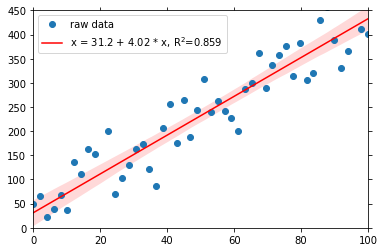

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

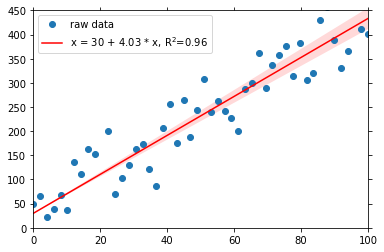

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

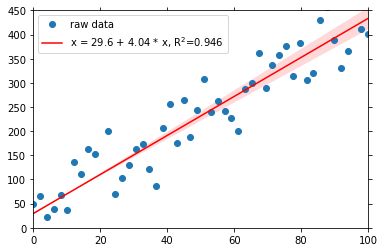

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')